In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [2]:
xgboost_model = XGBClassifier(random_state=17, use_label_encoder=False)

In [3]:
xgboost_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 17,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [4]:
cv_results = cross_validate(xgboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [5]:
cv_results['test_accuracy'].mean()

0.7526525761819879

In [6]:
cv_results['test_f1'].mean()

0.6317893713482235

In [7]:
cv_results['test_roc_auc'].mean()

0.7987134870719776

In [8]:
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.7, 1]}

In [9]:
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [10]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X, y)

In [11]:
cv_results = cross_validate(xgboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [12]:
cv_results['test_accuracy'].mean()

0.7578643578643579

In [13]:
cv_results['test_f1'].mean()

0.6297649135382188

In [14]:
cv_results['test_roc_auc'].mean()

0.8145597484276731

In [15]:
lgbm_model = LGBMClassifier(random_state=17)

In [16]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [17]:
cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [18]:
cv_results['test_accuracy'].mean()

0.7474492827434004

In [19]:
cv_results['test_f1'].mean()

0.624110522144179

In [20]:
cv_results['test_roc_auc'].mean()

0.7990293501048218

In [21]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [22]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [23]:
lgbm_best_grid.best_params_

{'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 300}

In [24]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [25]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [26]:
cv_results['test_accuracy'].mean()

0.7643578643578645

In [27]:
cv_results['test_f1'].mean()

0.6372062920577772

In [28]:
cv_results['test_roc_auc'].mean()

0.8147491264849755

In [29]:
lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

In [30]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [31]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [32]:
lgbm_best_grid.best_params_

{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'n_estimators': 200}

In [33]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [34]:
cv_results['test_accuracy'].mean()

0.7643833290892115

In [35]:
cv_results['test_f1'].mean()

0.6193071162618689

In [36]:
cv_results['test_roc_auc'].mean()

0.8227931516422082

In [37]:
lgbm_model = LGBMClassifier(random_state=17, colsample_bytree=0.9, learning_rate=0.01)

In [38]:
lgbm_params = {"n_estimators": [200, 400, 1000, 5000, 8000, 9000, 10000]}

In [39]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [40]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [41]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [42]:
cv_results['test_accuracy'].mean()

0.7643833290892115

In [43]:
cv_results['test_f1'].mean()

0.6193071162618689

In [44]:
cv_results['test_roc_auc'].mean()

0.8227931516422082

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [2]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [3]:
cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [4]:
cv_results['test_accuracy'].mean()

0.7735251676428148

In [5]:
cv_results['test_f1'].mean()

0.6502723851348231

In [6]:
cv_results['test_roc_auc'].mean()

0.8378923829489867

In [7]:
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

In [8]:
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [9]:
catboost_best_grid.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.01}

In [11]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

In [12]:
cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [13]:
cv_results['test_accuracy'].mean()

0.7721755368814192

In [14]:
cv_results['test_f1'].mean()

0.6322580676028952

In [15]:
cv_results['test_roc_auc'].mean()

0.842001397624039

In [16]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

In [18]:
rf_model = RandomForestClassifier(random_state=17)

In [19]:
rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "auto", "sqrt"],
                    "min_samples_split": np.random.randint(2, 50, 20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

In [20]:
rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=100,  # denenecek parametre sayısı
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

In [21]:
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([25, 27, 11, 19, 14, 28, 23, 10,  7,  9]),
                                        'max_features': [3, 5, 7, 'auto',
                                                         'sqrt'],
                                        'min_samples_split': array([10, 19, 18, 49, 31, 20, 33,  5, 29, 43, 34,  8, 38, 40, 14, 42,  8,
       19, 37, 20]),
                                        'n_estimators': [200, 344, 488, 633,
                                                         777, 922, 1066, 1211,
                                                         1355, 1500]},
                   random_state=42, verbose=True)

In [22]:
rf_random.best_params_

{'n_estimators': 1355,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 25}

In [23]:
rf_random_final = rf_model.set_params(**rf_random.best_params_, random_state=17).fit(X, y)

In [24]:
cv_results = cross_validate(rf_random_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [25]:
cv_results['test_accuracy'].mean()

0.7761225702402172

In [26]:
cv_results['test_f1'].mean()

0.6476828661140268

In [27]:
cv_results['test_roc_auc'].mean()

0.8329608665269042

In [28]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)
    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')
    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

In [29]:
rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]

In [30]:
rf_model = RandomForestClassifier(random_state=17)

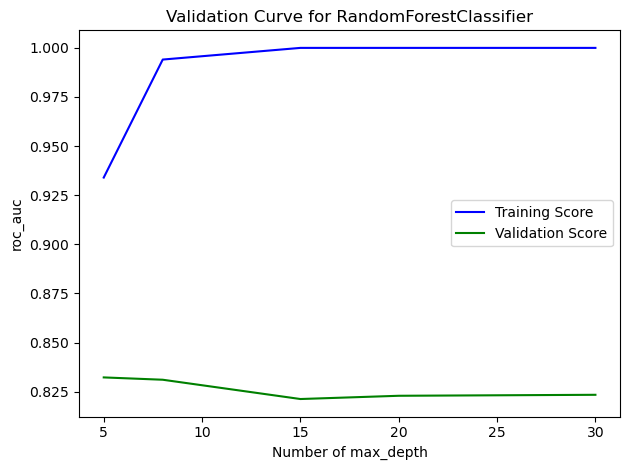

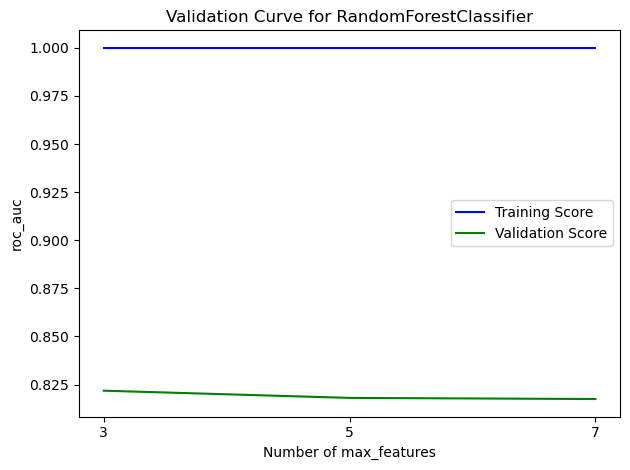

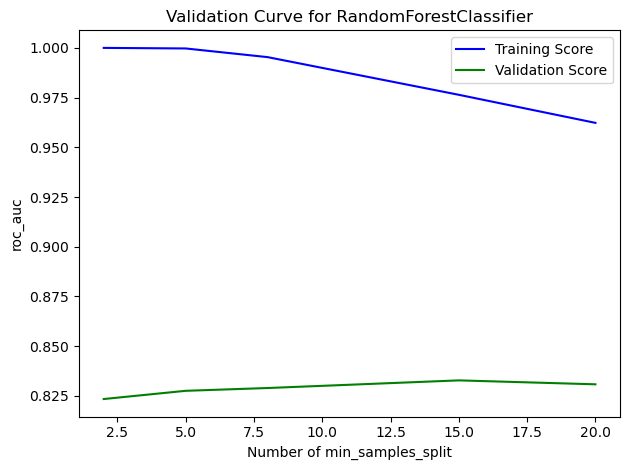

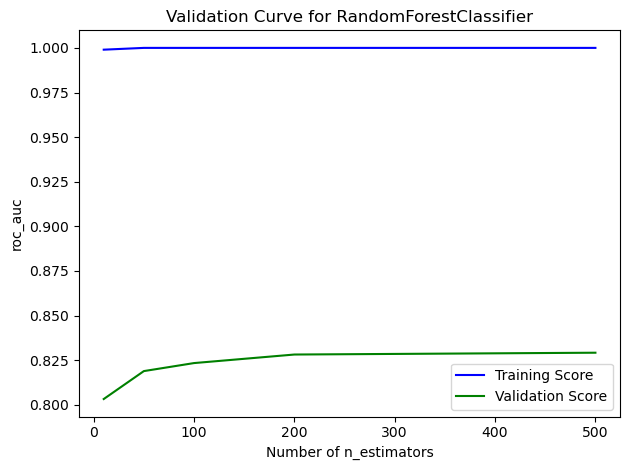

In [31]:
for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1])

In [32]:
rf_val_params[0][1]

[5, 8, 15, 20, 30, None]